In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('4_f_1.csv')

In [2]:
data_list = data['data'].values

1	По заданному массиву кардиоинтервалов рассчитать спектральную плотность мощности и построить ее график.

In [156]:
#1.	разбивка записи на три сегмента
tmp_list1 = np.arange(100)
tmp_list2 = np.arange(100)
tmp_list3 = np.arange(100)
i, i1, i2, i3 = 0, 0, 0, 0

for i in range(300):
    if (i < 99):
        tmp_list1[i1] = data_list[i]
        i +=1
        i1 += 1
    if (i < 200 and i > 99):
        tmp_list2[i2] = data_list[i]
        i +=1
        i2 += 1
    if (i < 299 and i > 199):
        tmp_list3[i3] = data_list[i]
        i +=1
        i3 += 1


In [157]:
#2.	преобразование Фурье ряда значений xi, i = 1,2,…,N, с использованием БПФ;
Xl1 = np.fft.fft(tmp_list1)
Xl2 = np.fft.fft(tmp_list2)
Xl3 = np.fft.fft(tmp_list3)


In [158]:
#3.	нормирование амплитуд спектра Xl умножением на sqtr(2);
i = 0
for i in range(100):
    Xl1[i] = Xl1[i]*math.sqrt(2)
    Xl2[i] = Xl2[i]*math.sqrt(2)
    Xl3[i] = Xl3[i]*math.sqrt(2)
    i += 1


In [159]:
#4.	определение спектральной плотности мощности по формуле...
Pl1 = np.arange(49, dtype=complex)
Pl2 = np.arange(49, dtype=complex)
Pl3 = np.arange(49, dtype=complex)
Pl = np.arange(149, dtype=complex)

i, l= 0, 0
for i in range(100):
    for l in range(49):
        Pl1[l] = abs(50*Xl1[l]*Xl1[l])
        Pl2[l] = abs(50*Xl2[l]*Xl2[l])
        Pl3[l] = abs(50*Xl3[l]*Xl3[l])
        l += 1
    i +=1
Pl1[0] = Pl1[1]
Pl2[0] = Pl2[1]
Pl3[0] = Pl3[1]
i, l= 0, 0
for i in range(100):
    for l in range(149):
        Pl[l] = abs(50*Xl[l]*Xl[l])
        l += 1
    i +=1

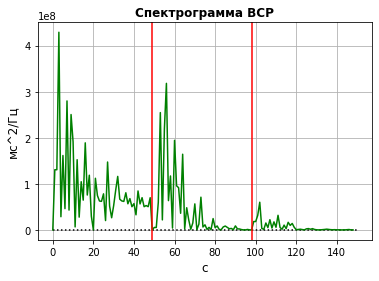

In [160]:
norm_data_list = np.arange(149)
l1 = [item.real for item in Pl1]
l2 = [item.real for item in Pl2]
l3 = [item.real for item in Pl3]
i, i1, i2, i3 = 0, 0, 0, 0
for i in range(150):
    if (i < 49 and i > 0):
        norm_data_list[i]=l1[i1]
        i += 1
        i1 += 1
    if (i < 98 and i > 49):
        norm_data_list[i]=l2[i2]
        i += 1
        i2 += 1
    if (i < 147 and i > 98 ):
        norm_data_list[i]=l3[i3]/10
        i += 1
        i3 += 1


plt.plot(norm_data_list[0:150], color = 'g')
plt.axvline(x=49, color = 'r')
plt.axvline(x=98, color = 'r')

plt.grid()
plt.hlines(0, 0, 150, linestyle = ':')
x_label = plt.xlabel('c', fontsize=12)
y_label = plt.ylabel('мс^2/Гц', fontsize=12)
title = plt.title('Спектрограмма ВСР', fontweight="bold")

2	В соответствии с таблицей 1 рассчитать мощности спектров в каждом из указанных диапазоне частот, указать их минимальное и максимальное значения. 

HF - [98; 147]
LF - [49; 98]
VLF - [0; 49]

In [130]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return theSum

HF_max = max(l3)
HF_min = min(l3)
HF = listsum(l3)
LF_max = max(l2)
LF_min = min(l2)
LF =  listsum(l2)
VLF_max = max(l1)
VLF_min = min(l1)
VLF =  listsum(l1)

print('HF_max =', '{0:.3f}'.format(HF_max))
print('HF_min =', '{0:.3f}'.format(HF_min))
print('HF =', '{0:.3f}'.format(HF))
print('----------------')
print('LF_max =', '{0:.3f}'.format(LF_max))
print('LF_min =', '{0:.3f}'.format(LF_min))
print('LF =', '{0:.3f}'.format(LF))
print('----------------')
print('VLF_max =', '{0:.3f}'.format(VLF_max))
print('VlF_min =', '{0:.3f}'.format(VLF_min))
print('VLF =', '{0:.3f}'.format(VLF))

HF_max = 601202563.930
HF_min = 70015.247
HF = 3223751418.141
----------------
LF_max = 318142511.889
LF_min = 58746.468
LF = 1989652025.467
----------------
VLF_max = 429068876.901
VlF_min = 175070.900
VLF = 4372645556.739


3	Рассчитать суммарную мощность спектра ВСР (TP) и мощности спектра в каждом частотном диапазоне в процентном отношении ко всему диапозону.

In [154]:
TP = HF + LF + VLF
dHF = HF / TP
dLF = LF / TP
dVLF = VLF / TP

print('TP =', '{0:.3f}'.format(TP))
print('HF/TP =', '{0:.3f}'.format(dHF))
print('LF/TP =', '{0:.3f}'.format(dLF))
print('VLF/TP =', '{0:.3f}'.format(dVLF))

TP = 9586049000.348
HF/TP = 0.336
LF/TP = 0.208
VLF/TP = 0.456


4	По полученным данным рассчитать индекс централизации ИЦ (IC), индекс вагосимпатического взаимодействия ИВВ и индекс активации подкорковых нервных центров ИАП (ISCA).

In [155]:
IC = (VLF + LF) / HF
ISCA = LF / VLF

print('IC =', '{0:.3f}'.format(IC))
print('ISCA =', '{0:.3f}'.format(ISCA))

IC = 1.974
ISCA = 0.455
